# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [7]:
import pandas as pd
from queue import PriorityQueue

df = pd.read_csv('train.csv')
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [150]:
def num_nans(df):
    return df.isna().any(axis=1).sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [151]:
def drop_na(df):
    NaN_Value_Count = df.isna().sum()
    df.drop(columns = NaN_Value_Count[NaN_Value_Count > 200].index, inplace=True)
    return df

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [152]:
def to_numerical(df):
    df['Sex'].replace('male', 0, inplace = True)
    df['Sex'].replace('female', 1 , inplace = True)
    return df['Sex']

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [153]:
def extract_names(df):
    temp = df['Name'].str.split(',', expand=True)
    temp_last = temp[0]
    temp = temp[1].str.split('.', expand=True)
    temp_title = temp[0]
    temp = temp[1].str.strip().str.split(' ', expand=True)
    df = pd.DataFrame({
        "First Name": temp[0],
        "Middle Name": temp[1],
        "Last Name": temp_last,
        "Title": temp_title
    })
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [154]:
def replace_with_mean(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    return df['Age']

df['Age'] = replace_with_mean(df)
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,James,None,Moran,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

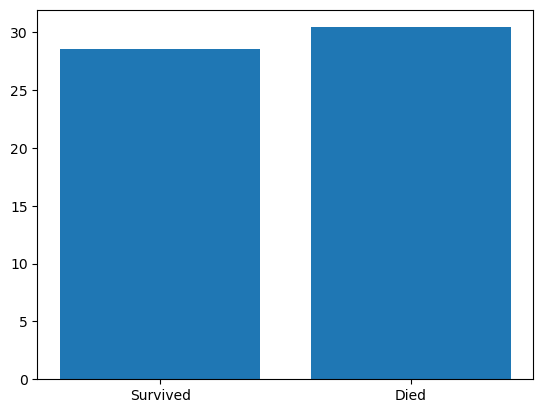

In [155]:
import matplotlib.pyplot as plt

survive = df[df['Survived'] == 1]['Age'].mean()
die = df[df['Survived']== 0]['Age'].mean()

plt.bar(range(2), [survive, die], tick_label = ['Survived', 'Died'])
plt.show()

-> your answer here
* The average age of the people survived (28.5) is about 2 less than the average age of people who died (30.4).

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

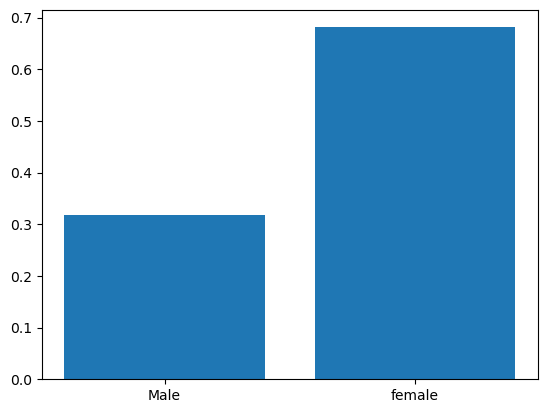

In [156]:
survived = df[df['Survived'] == 1] # 342
sMale = len(survived[survived['Sex']==0])/len(survived)
sFemale = len(survived[survived['Sex']==1])/len(survived)
plt.bar(['Male', 'female'],[sMale, sFemale]) # 0.31871345029239767 0.6812865497076024
plt.show()

-> your answer here
* About 32% of the people survived were male. There were nearly twice as many survived female as survived male. Female on Titantic were more likely to survive. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

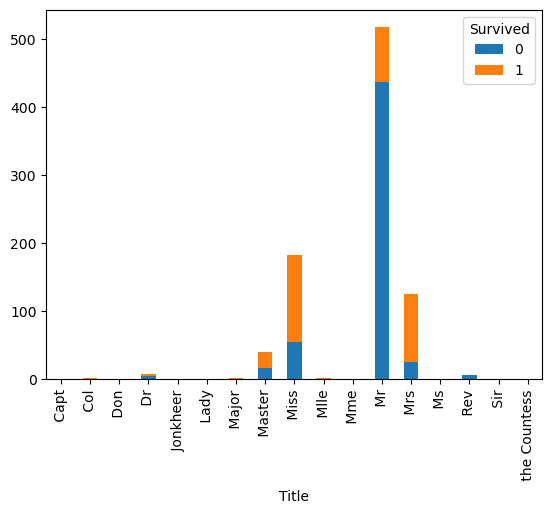

In [157]:
pd.crosstab(index = df["Title"], columns = df["Survived"]).plot(kind = 'bar', stacked = True)
plt.show()

-> your answer here
* Most people on board had title Mr, Miss, Mrs and Master. Woman that had title Miss and Mrs had the higher chance to survive (Over 50%). About 50% of Masters survived. And the survival proportion of Mr is relatively low (only 15%). Overall, female had higher chance to survive than male.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

48.39540760233917 22.117886885245877


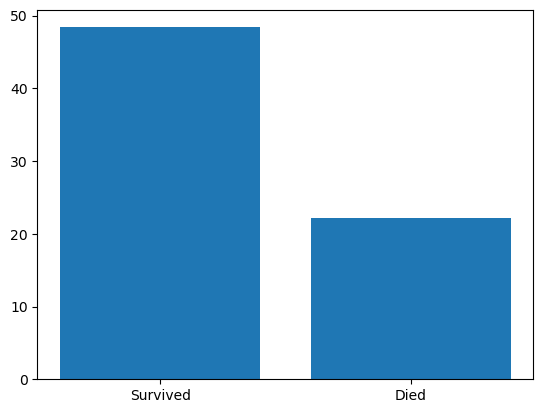

In [158]:
survived_fare_mean = df[df['Survived'] == 1]['Fare'].mean()
died_fare_mean = df[df['Survived'] == 0]['Fare'].mean()
print(survived_fare_mean, died_fare_mean)
plt.bar(['Survived', "Died"], [survived_fare_mean, died_fare_mean])
plt.show()

-> your answer here
* The average boat fare for those who survived was more than double that of those who did not。

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

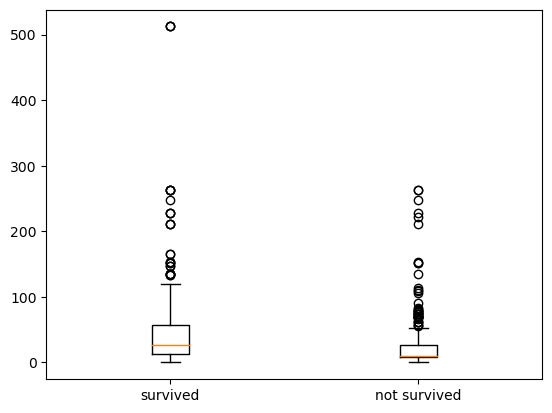

In [159]:
survived_fare = df[df['Survived'] == 1]['Fare']
die_fare = df[df['Survived'] == 0]['Fare']
plt.boxplot([survived_fare, die_fare], labels = ['survived', 'not survived'])
plt.show()

-> your answer here
* The people who survived had higher average fares than the people did not survive.

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [160]:
def modify_fare(df):
    mean = df['Fare'].mean()
    std = df['Fare'].std()
    df['newFare'] = (df['Fare']-mean)/std

modify_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title,newFare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr,-0.486064


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [176]:
df = df._get_numeric_data()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,newFare
0,1,0,3,0,22.0,1,0,7.2500,-0.502163
1,2,1,1,1,38.0,1,0,71.2833,0.786404
2,3,1,3,1,26.0,0,0,7.9250,-0.488580
3,4,1,1,1,35.0,1,0,53.1000,0.420494
4,5,0,3,0,35.0,0,0,8.0500,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [177]:
df1 = df

def Euclidean_dist(x, y):
    res = 0
#     print(x)
#     print(y)
    for i in range(1, len(x)):
#         print(str(x[i]) + " - " + str(y[i]))
        res += (x[i] - y[i])**2
    return res**(1/2)


def N_most_similar_pairs(df1, N):
    df1 = df1.drop(["Fare"], axis=1)
    dist_array = [[999999 for i in range(i + 1)] for i in range(len(df1))]
    for i in range(len(df1)):
        for j in range(i):
            dist_array[i][j] = Euclidean_dist(df1.iloc[[i]].values.tolist()[0], df1.iloc[[j]].values.tolist()[0])
#     print(dist_array)

    # find most similar
    temp = PriorityQueue()
    dist_sort = PriorityQueue()
    for i in range(len(df1)):
        for j in range(i):
            temp.put((dist_array[i][j], (i,j)))

    # delete all 0
    while not temp.empty():
        item = temp.get()
        if item[0] != 0:
            dist_sort.put(item)
        
    # show results
    answer  = "\n"
    for i in range(N):
        elem = dist_sort.get()
#         print(elem)
        answer += str(i+1) + "th most similar pair with distance " + str(elem[0]) + ": passengerID:" + str(elem[1][0]-1) + " and passengerID:" + str(elem[1][1]-1) + "\n"
    
    return answer

    

# N_most_similar_pairs(df1, 1)
print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df1, 3)))
print("In this function, (Survived, Pclass, Sex, Age, SibSp, Parch, newFare) are considered into Euclidean_dist")

The 3 most similar pairs of passengers are: 
1th most similar pair with distance 8.250587886043936e-05: passengerID:577 and passengerID:239
2th most similar pair with distance 8.250587886049487e-05: passengerID:628 and passengerID:387
3th most similar pair with distance 8.451821736921161e-05: passengerID:366 and passengerID:18

In this function, (Survived, Pclass, Sex, Age, SibSp, Parch, newFare) are considered into Euclidean_dist


## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

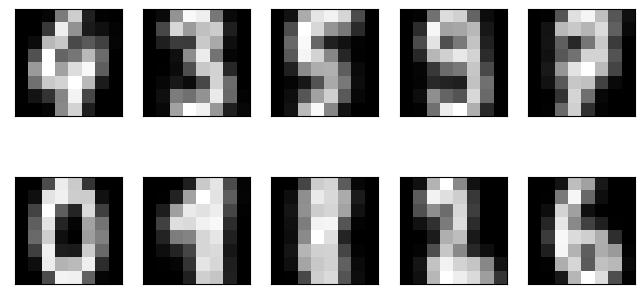

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()
X = mnist.data / 16.0
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(X)
centroids = kmeans.cluster_centers_.reshape(-1, 8, 8)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))
for a, b in enumerate(ax.flat):
    b.imshow(centroids[a], cmap='gray')
    b.set(xticks=[], yticks=[])
plt.show()


b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

In [3]:
from sklearn.metrics import silhouette_score
origin_silscore = silhouette_score(X, mnist.target)
kmeans_silscore = silhouette_score(X, kmeans.labels_)
print("origin_silscore: ", origin_silscore)
print("kmeans_silscore: ", kmeans_silscore)

origin_silscore:  0.1629432052257522
kmeans_silscore:  0.18251916424600556


Basiclly, higher silhouette score indicates better clustering results. The two scores we got above are pretty similar. Kmeans have a little higher silhouette score.

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

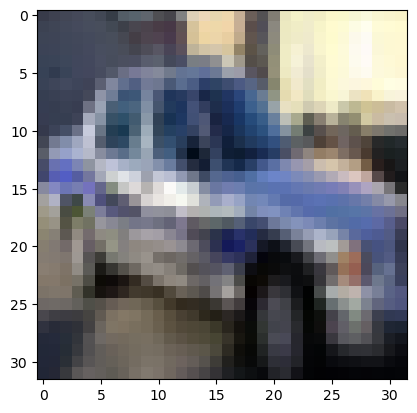

In [61]:
import matplotlib.pyplot as plt
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

dataset = unpickle("cifar-10-batches-py/data_batch_1")
X = dataset[b'data'].reshape(10000, 3 , 32, 32).transpose(0,2,3,1).astype("uint8")
plt.imshow(X[311])

d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

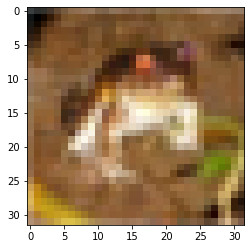

In [42]:
from IPython.display import Image
Image(filename="frog.png", width=300, height=300)

The transformation, using only 4 colors / centroids would look like:

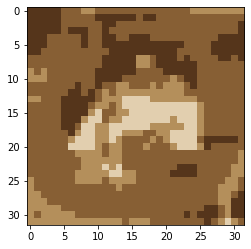

In [3]:
Image(filename="frog_4.png", width=300, height=300)

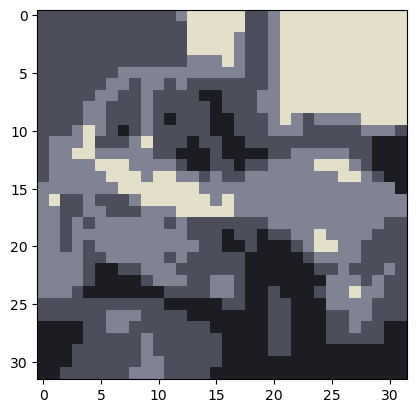

In [62]:
from collections import Counter
(h,w,c) = X[311].shape
img2D = X[311].reshape(h*w,c)

model = KMeans(n_clusters=4) 
labels = model.fit_predict(img2D)

labels_count = Counter(labels)
rgb_cols = model.cluster_centers_.round(0).astype(int)
plt.imshow(np.reshape(rgb_cols[labels],(h,w,c)))

e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

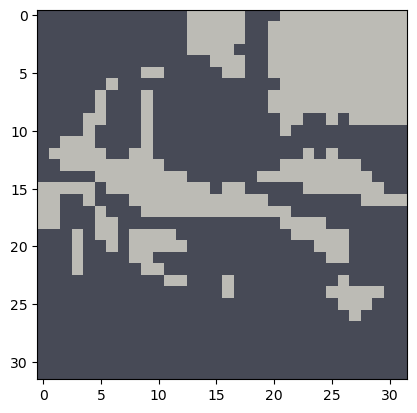

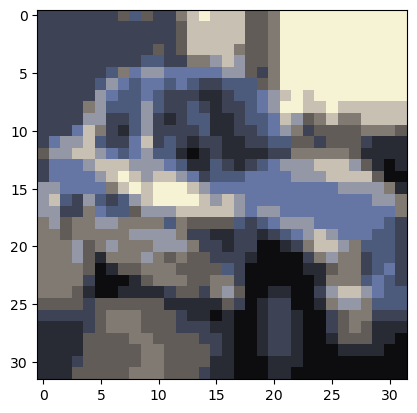

In [66]:
def num_centroids (num, X):
    from collections import Counter
    (h,w,c) = X[311].shape
    img2D = X[311].reshape(h*w,c)

    model = KMeans(n_clusters=num) 
    labels = model.fit_predict(img2D)

    labels_count = Counter(labels)
    rgb_cols = model.cluster_centers_.round(0).astype(int)
    return np.reshape(rgb_cols[labels],(h,w,c))

plt.imshow(num_centroids(2,X))
plt.show()
plt.imshow(num_centroids(10,X))
plt.show()